In [1]:
#Load libraries
import matplotlib.pyplot as plt
import numpy as np
import random
import os
import sys
import pandas as pd
import warnings
import seaborn as sb

In [2]:
aggr_results = pd.read_csv('mdata.csv',index_col="Unnamed: 0")
aggr_results

,orig.ident,nCount_peaks,nFeature_peaks,TSS_fragments,DNase_sensitive_region_fragments,enhancer_region_fragments,promoter_region_fragments,on_target_fragments,blacklist_region_fragments,peak_region_fragments,...,prediction.score.Fibroblasts_SM,prediction.score.Endothelial,prediction.score.Endocardium,prediction.score.Pericytes,prediction.score.Unknown,prediction.score.Epicardial,prediction.score.TCells,prediction.score.max,harmony_snn_res.1,seurat_clusters
AAACGAAAGAAGAGTG-5,SeuratProject,13869,6348,3997,6900,3940,3461,8937,11,7288,...,0.000196,0.000000,0.000000,0.900857,0.039217,0.0,0.0,0.900857,6,6
AAACGAAAGAATACTG-5,SeuratProject,16263,7073,4230,7331,4761,3592,10019,28,8511,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.993558,2,2
AAACGAAAGAATCAAC-5,SeuratProject,12535,5531,3760,6304,3761,3191,8553,7,6558,...,0.000000,0.961805,0.000000,0.000000,0.008923,0.0,0.0,0.961805,3,3
AAACGAAAGACAGTGC-4,SeuratProject,6994,3302,1917,3296,1760,1747,4172,4,3625,...,0.000000,0.851903,0.004203,0.100223,0.005164,0.0,0.0,0.851903,1,1
AAACGAAAGAGCGGTT-5,SeuratProject,23099,9620,5724,10453,7023,4855,14337,50,12092,...,0.000000,0.000000,0.001074,0.000000,0.181597,0.0,0.0,0.817330,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTGTTCTATACCT-5,SeuratProject,10651,4721,2826,4991,2933,2491,6501,6,5483,...,0.000000,0.635820,0.300242,0.000000,0.060722,0.0,0.0,0.635820,12,12
TTTGTGTTCTATGAGC-2,SeuratProject,7790,3674,2089,3634,2242,1867,4855,16,4049,...,0.000000,0.000000,0.000000,0.000000,0.093549,0.0,0.0,0.859390,5,5
TTTGTGTTCTCTATTG-2,SeuratProject,11407,5073,3031,5242,2993,2752,6852,6,5905,...,0.024921,0.582696,0.238928,0.041661,0.081992,0.0,0.0,0.582696,12,12
TTTGTGTTCTGACATG-5,SeuratProject,23780,9957,6754,12317,7303,5746,16028,11,12435,...,0.003860,0.873689,0.000000,0.042298,0.033101,0.0,0.0,0.873689,8,8


In [3]:
aggr_results.columns

Index(['orig.ident', 'nCount_peaks', 'nFeature_peaks', 'TSS_fragments',
       'DNase_sensitive_region_fragments', 'enhancer_region_fragments',
       'promoter_region_fragments', 'on_target_fragments',
       'blacklist_region_fragments', 'peak_region_fragments',
       'peak_region_cutsites', 'passed_filters', 'duplicate', 'cell_id',
       'is__cell_barcode', 'types', 'dtype', 'nucleosome_signal',
       'nucleosome_percentile', 'TSS.enrichment', 'TSS.percentile',
       'pct_reads_in_peaks', 'blacklist_ratio', 'nCount_RNA', 'nFeature_RNA',
       'predicted.id', 'prediction.score.Macrophages',
       'prediction.score.Fibroblasts', 'prediction.score.Cardiomyocytes',
       'prediction.score.Fibroblasts_SM', 'prediction.score.Endothelial',
       'prediction.score.Endocardium', 'prediction.score.Pericytes',
       'prediction.score.Unknown', 'prediction.score.Epicardial',
       'prediction.score.TCells', 'prediction.score.max', 'harmony_snn_res.1',
       'seurat_clusters'],
      

No handles with labels found to put in legend.


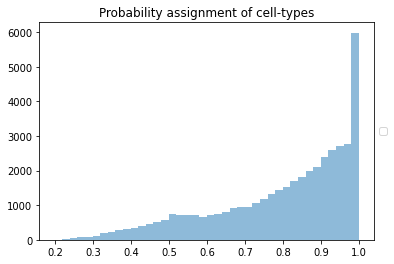

In [5]:
plt.hist(aggr_results['prediction.score.max'], 
             bins=40, 
             alpha=0.5)
plt.title(f'Probability assignment of cell-types')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [16]:
seurat_clusters = list(range(0,20))

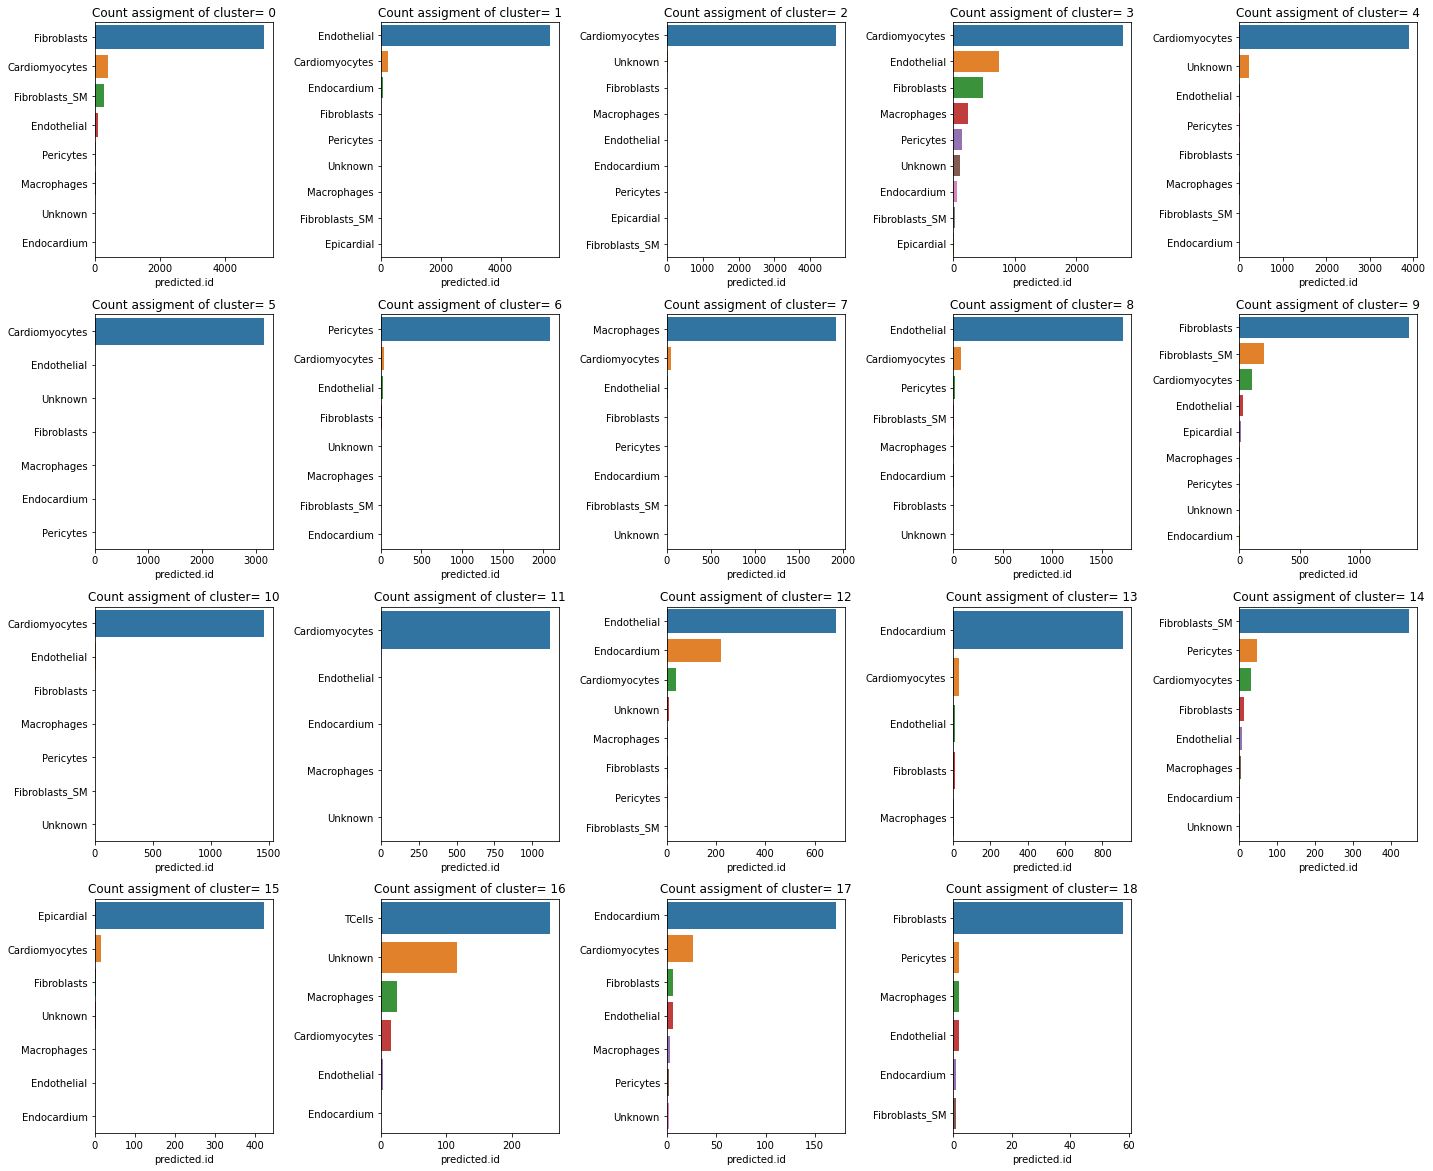

In [17]:
fig = plt.figure(figsize=(20,20))
for c,num in zip(seurat_clusters,range(1,len(seurat_clusters))):  
    
    ax = fig.add_subplot(5,5,num)
    balance_count = pd.DataFrame(aggr_results[aggr_results['seurat_clusters']==c]['predicted.id'].value_counts())
    ax = sb.barplot(x="predicted.id", y=list(balance_count.index), data = balance_count)
    ax.set_title(f'Count assigment of cluster= {c}')      
        
plt.tight_layout()
plt.show()

In [18]:
classes = ['Cardiomyocytes', 'Fibroblasts', 'Endothelial', 'Endocardium', 'Unknown', 'Fibroblasts_SM', 'TCells',
          'Macrophages', 'Pericytes']

In [20]:
int_results_prob = aggr_results[['prediction.score.Cardiomyocytes', 'prediction.score.Fibroblasts',
       'prediction.score.Endothelial', 'prediction.score.Endocardium',
       'prediction.score.Unknown', 'prediction.score.Fibroblasts_SM',
       'prediction.score.TCells', 'prediction.score.Macrophages',
       'prediction.score.Pericytes','seurat_clusters']]

<ipython-input-21-68a686b99410>:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(5,5,num)
<ipython-input-21-68a686b99410>:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(5,5,num)
<ipython-input-21-68a686b99410>:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will alway

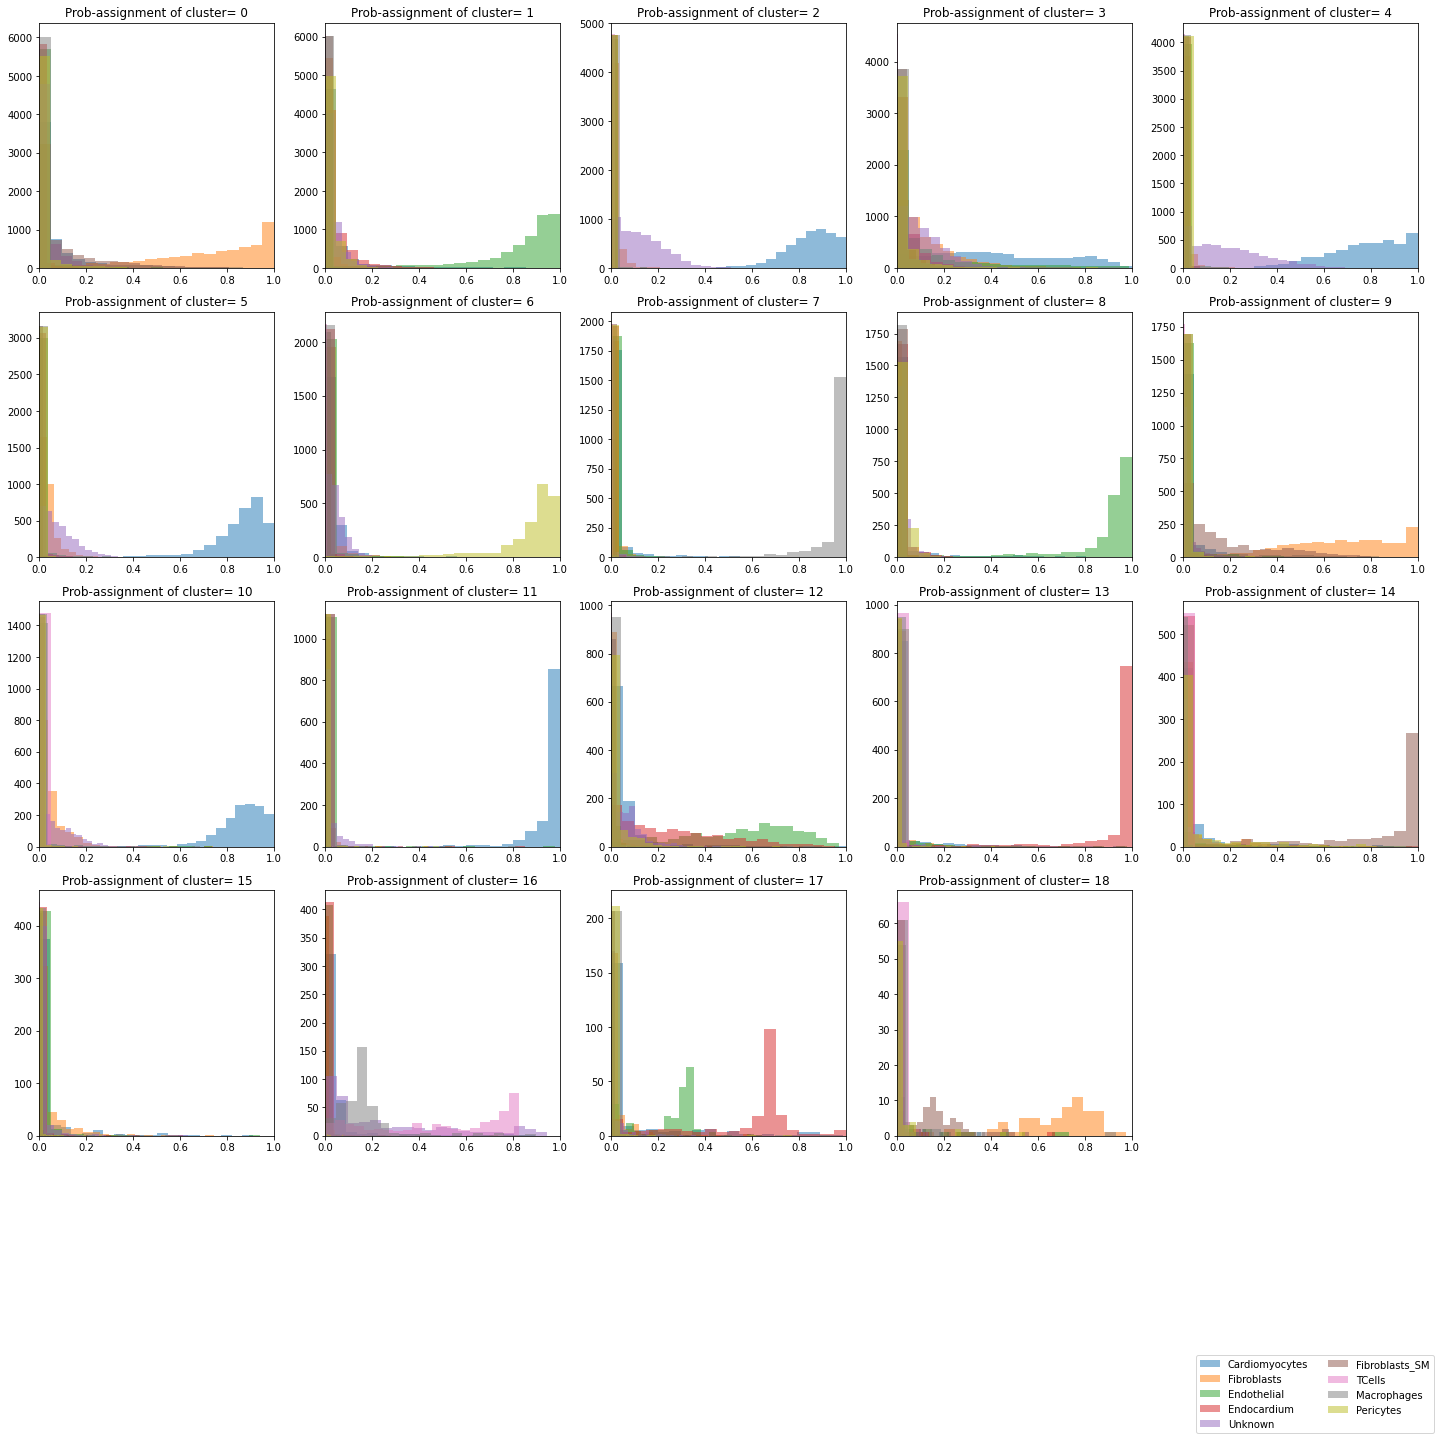

In [21]:
fig = plt.figure(figsize=(20,20))
for c,num in zip(seurat_clusters,range(1,len(seurat_clusters))):  
    df0=int_results_prob[int_results_prob['seurat_clusters']==c]
    for k in classes:  
        ax = fig.add_subplot(5,5,num)
        k = "prediction.score."+k
        ax.hist(df0[k], 
             bins=20, 
             alpha=0.5, 
             label=k);
        plt.xlim([0, 1.0])
        ax.set_title(f'Prob-assignment of cluster= {c}')

plt.tight_layout()
fig.legend(classes,loc='lower right',ncol=2) #bbox_to_anchor=(1, 0.5)) #prop={'size':20})
plt.show()